# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Keras functional and sequential API

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [6]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input

# Sequential vs. Functional API
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- Keras has two APIs which answers two different needs and can be defined as two way of absracting the deep learing framework implementation.
- The **sequential API** allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.
- The **functional API** in Keras is an alternate way of creating models that offers a lot more flexibility, including creating more complex models.

</font>
</div>

# Sequential API
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- The Sequential model API is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.
- There are **two ways** you can use the sequential API:
    - Pass the layers as an array
    - Layer can be add in a piecewise manner    
    
</font>
</div>

In [3]:
model = Sequential([Dense(2, input_dim=1),
                    Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


# Functional API
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- It specifically allows you to define multiple input or output models as well as models that share layers.
- A bracket notation is used as in `(current)(input)`
    
</font>
</div>

In [20]:
visible = Input(shape=(2,))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-info">
<font color=black>

- `hidden = Dense(2)(visible)` what is this syntax doing?
    - `Dense(2)` creates the layer via the class constructor hence via `__init__`
    - `(visibile)` is the second bracket “(input)” and is a function with no name implemented via the `__call__()` function, that when called will connect the layers.
    - The `__call__()` function is a default function on all Python objects that can be overridden and is used to “call” an instantiated object.
    
</font>
</div>

In [21]:
# Shorter notation
visible = Input(shape=(2,))
hidden = Dense(2)(visible)

In [22]:
# Equivalent
visible = Input(shape=(2,))
hidden = Dense(2)
# connect layer to previous layer
hidden.__call__(visible)

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_25')>

## MLPs
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- The model has 10 inputs, 3 hidden layers with 10, 20, and 10 neurons, and an output layer with 1 output. 
- Rectified linear activation functions are used in each hidden layer and a sigmoid activation function is used in the output layer, for binary classification.

</font>
</div>

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None


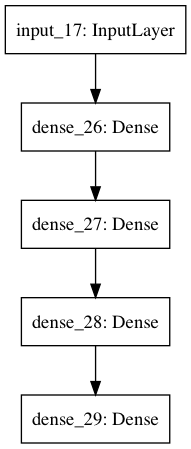

In [25]:
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model)

## CNNs
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- The model receives black and white 64×64 images as input, then has a sequence of two convolutional and pooling layers as feature extractors, followed by a fully connected layer to interpret the features and an output layer with a sigmoid activation for two-class predictions.

</font>
</div>

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                270

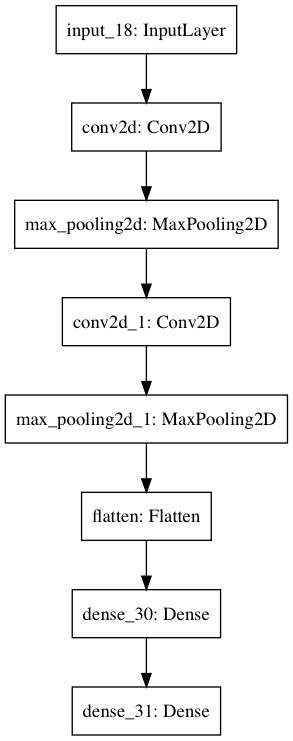

In [26]:
# Convolutional Neural Network
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

visible = Input(shape=(64, 64, 1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='convolutional_neural_network.png')

## RNNs
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- The model expects 100 time steps of one feature as input. The model has a single LSTM hidden layer to extract features from the sequence, followed by a fully connected layer to interpret the LSTM output, followed by an output layer for making binary predictions. 

</font>
</div>

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 100, 1)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


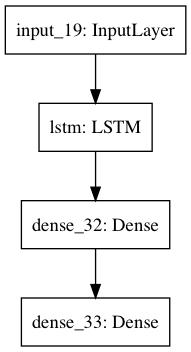

In [27]:
# Recurrent Neural Network
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM

visible = Input(shape=(100, 1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='recurrent_neural_network.png')

## Shared Input Layer
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- Multiple layers can share the output from one layer. For example, there may be multiple different feature extraction layers from an input, or multiple layers used to interpret the output from a feature extraction layer. 
- In this section, we define multiple convolutional layers with differently sized kernels to interpret an image input.
- The model takes black and white images with the size 64×64 pixels. There are two CNN feature extraction submodels that share this input; the first has a kernel size of 4 and the second a kernel size of 8. The outputs from these feature extraction submodels are flattened into vectors and concatenated into one long vector and passed on to a fully connected layer for interpretation before a final output layer makes a binary classification.

</font>
</div>

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 61, 61, 32)   544         input_22[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 57, 57, 16)   1040        input_22[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 30, 30, 32)   0           conv2d_4[0][0]                   
___________________________________________________________________________________________

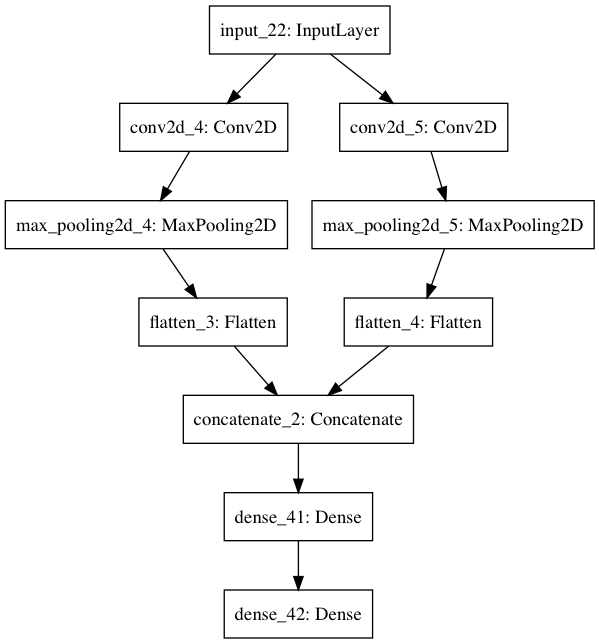

In [31]:
# Shared Input Layer
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

# input layer
visible = Input(shape=(64,64,1))
# first feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
# second feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)
# prediction output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='shared_input_layer.png')

## Shared Feature Extraction Layer
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- Multiple layers can share the output from one layer. For example, there may be multiple different feature extraction layers from an input, or multiple layers used to interpret the output from a feature extraction layer. 
- In this section, we will use two parallel submodels to interpret the output of an LSTM feature extractor for sequence classification.
- The input to the model is 100 time steps of 1 feature. An LSTM layer with 10 memory cells interprets this sequence. The first interpretation model is a shallow single fully connected layer, the second is a deep 3 layer model. The output of both interpretation models are concatenated into one long vector that is passed to the output layer used to make a binary prediction.
    
</font>
</div>

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 10)           480         input_20[0][0]                   
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 10)           110         lstm_1[0][0]                     
__________________________________________________________________________________________________
dense_36 (Dense)                (None, 20)           220         dense_35[0][0]                   
___________________________________________________________________________________________

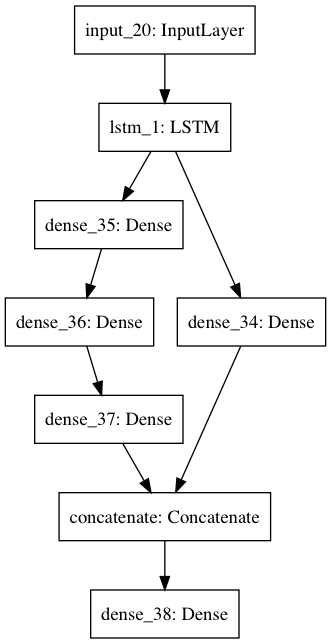

In [29]:
# Shared Feature Extraction Layer
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate

# define input
visible = Input(shape=(100,1))
# feature extraction
extract1 = LSTM(10)(visible)
# first interpretation model
interp1 = Dense(10, activation='relu')(extract1)
# second interpretation model
interp11 = Dense(10, activation='relu')(extract1)
interp12 = Dense(20, activation='relu')(interp11)
interp13 = Dense(10, activation='relu')(interp12)
# merge interpretation
merge = concatenate([interp1, interp13])
# output
output = Dense(1, activation='sigmoid')(merge)
model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='shared_feature_extractor.png')

## Multiple Input Model
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- The functional API can also be used to develop more complex models with multiple inputs, possibly with different modalities. It can also be used to develop models that produce multiple outputs. 
- We will develop an image classification model that takes two versions of the image as input, each of a different size. 
- Specifically a black and white 64×64 version and a color 32×32 version. Separate feature extraction CNN models operate on each, then the results from both models are concatenated for interpretation and ultimate prediction.
    
</font>
</div>

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 61, 61, 32)   544         input_23[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 29, 29, 32)   1568        input_24[0][0]                   
___________________________________________________________________________________________

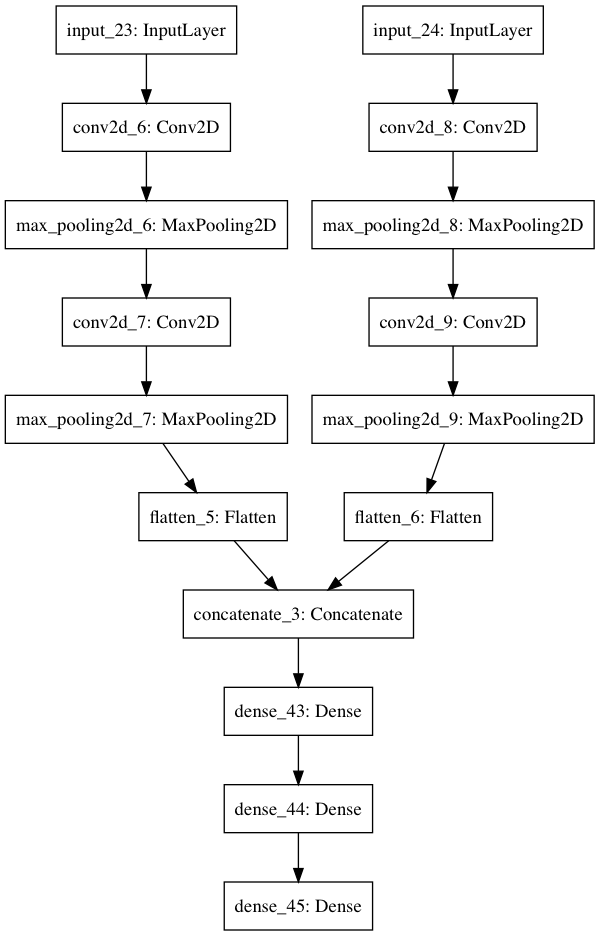

In [32]:
# Multiple Inputs
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

# first input model
visible1 = Input(shape=(64,64,1))
conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)
# second input model
visible2 = Input(shape=(32,32,3))
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)
# merge input models
merge = concatenate([flat1, flat2])
# interpretation model
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=[visible1, visible2], outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multiple_inputs.png')

## Multiple Ouput Model
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- The functional API can also be used to develop more complex models with multiple inputs, possibly with different modalities. It can also be used to develop models that produce multiple outputs. 
- We will develop a model that makes two different types of predictions. Given an input sequence of 100 time steps of one feature, the model will both classify the sequence and output a new sequence with the same length.
- An LSTM layer interprets the input sequence and returns the hidden state for each time step. The first output model creates a stacked LSTM, interprets the features, and makes a binary prediction. The second output model uses the same output layer to make a real-valued prediction for each input time step.
    
</font>
</div>

Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 100, 10)      480         input_25[0][0]                   
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 10)           840         lstm_2[0][0]                     
__________________________________________________________________________________________________
dense_46 (Dense)                (None, 10)           110         lstm_3[0][0]                     
___________________________________________________________________________________________

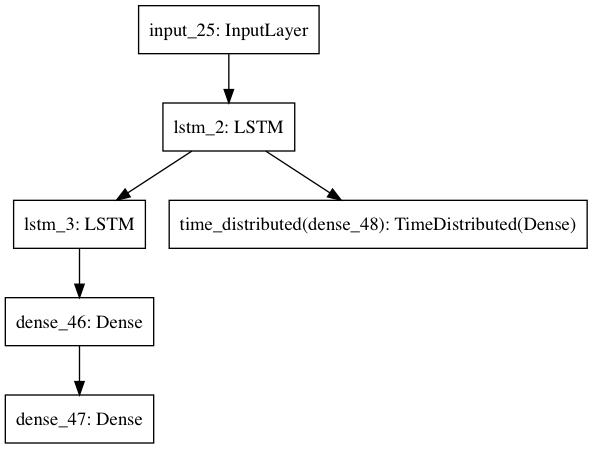

In [33]:
# Multiple Outputs
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed

# input layer
visible = Input(shape=(100, 1))
# feature extraction
extract = LSTM(10, return_sequences=True)(visible)
# classification output
class11 = LSTM(10)(extract)
class12 = Dense(10, activation='relu')(class11)
output1 = Dense(1, activation='sigmoid')(class12)
# sequence output
output2 = TimeDistributed(Dense(1, activation='linear'))(extract)
# output
model = Model(inputs=visible, outputs=[output1, output2])

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multiple_outputs.png')

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/keras-functional-api-deep-learning/

</font>
</div>